<a href="https://colab.research.google.com/github/rahulvenkat207/calculas/blob/main/linear_interp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt


In [38]:
def generate_angles(num_points):
    return np.linspace(0, np.pi/2, num_points)

In [39]:
def calculate_sine(angles):
    return np.sin(angles)

In [40]:
def second_derivative(y_values, step_size):
    second_deriv = np.zeros_like(y_values)
    second_deriv[1:-1] = (y_values[2:] - 2*y_values[1:-1] + y_values[:-2]) / (step_size**2)
    return second_deriv

In [41]:
def interpolation_error(angles, y_values):
    midpoints = (angles[1:] + angles[:-1]) / 2
    interpolated_values = y_values[:-1] + (y_values[1:] - y_values[:-1]) / (angles[1:] - angles[:-1]) * (midpoints - angles[:-1])
    actual_values = np.sin(midpoints)
    return np.abs(actual_values - interpolated_values)

In [42]:
def adaptive_point_sampling(tolerance=1e-4, max_iterations=100):
    num_points = 10
    init_angles = generate_angles(num_points)
    init_sine = calculate_sine(init_angles)

    for _ in range(max_iterations):
        angles = generate_angles(num_points)
        sine_values = calculate_sine(angles)
        step_size = angles[1] - angles[0]
        second_deriv = second_derivative(sine_values, step_size)
        errors = interpolation_error(angles, sine_values)
        max_error = np.max(errors)

        error_ratio = max_error / tolerance

        if error_ratio > 1:
            num_points = int(num_points * (1 + error_ratio))
        elif error_ratio < 0.5:
            num_points = max(10, int(num_points * (0.5 + error_ratio)))
        else:
            break

    return init_angles, init_sine, angles, sine_values, second_deriv, num_points, error_ratio

In [43]:
def non_uniform_second_derivative(x, y):
    second_deriv = np.zeros_like(y)
    for i in range(1, len(x) - 1):
        h1 = x[i] - x[i-1]
        h2 = x[i+1] - x[i]
        second_deriv[i] = 2 / (h1 + h2) * ((y[i+1] - y[i]) / h2 - (y[i] - y[i-1]) / h1)
    return second_deriv

In [44]:
def refine_sample_points(angles, y_values, original_second_deriv, error_tolerance=1e-6, deriv_tolerance=1e-4):
    refined_angles = angles.copy()
    refined_y_values = y_values.copy()
    refined_second_deriv = original_second_deriv.copy()

    i = 1
    while i < len(refined_angles) - 1:
        temp_angles = np.delete(refined_angles, i)
        temp_y_values = np.delete(refined_y_values, i)
        temp_second_deriv = np.delete(refined_second_deriv, i)

        new_second_deriv = non_uniform_second_derivative(temp_angles, temp_y_values)
        new_errors = interpolation_error(temp_angles, temp_y_values)

        if (np.max(np.abs(new_second_deriv - temp_second_deriv)) < deriv_tolerance and
            np.max(new_errors) < error_tolerance):
            refined_angles = temp_angles
            refined_y_values = temp_y_values
            refined_second_deriv = new_second_deriv
        else:
            i += 1

    return refined_angles, refined_y_values

In [45]:
def create_table(angles, y_values):
    return np.column_stack((angles, y_values))

In [46]:
def plot_results(init_angles, init_y_values, refined_angles, refined_y_values, error_ratio):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    ax1.plot(init_angles, init_y_values, 'bo-', label=f'Initial ({len(init_angles)} points)')
    ax1.plot(np.linspace(0, np.pi/2, 1000), np.sin(np.linspace(0, np.pi/2, 1000)), 'r--', label='True Sine')
    ax1.set_title('Initial Sine Approximation')
    ax1.set_xlabel('Angle (radians)')
    ax1.set_ylabel('Sine')
    ax1.legend()

    ax2.plot(refined_angles, refined_y_values, 'ro-', label=f'Refined ({len(refined_angles)} points)')
    ax2.plot(np.linspace(0, np.pi/2, 1000), np.sin(np.linspace(0, np.pi/2, 1000)), 'b--', label='True Sine')
    ax2.set_title('Refined Sine Approximation')
    ax2.set_xlabel('Angle (radians)')
    ax2.set_ylabel('Sine')
    ax2.legend()

    plt.suptitle(f'Adaptive Sampling: Initial {len(init_angles)} points, Refined to {len(refined_angles)} points\nFinal Error Ratio: {error_ratio:.4f}', fontsize=16)
    plt.tight_layout()
    plt.show()

Initial Lookup Table (10 points):
[[0.         0.        ]
 [0.17453293 0.17364818]
 [0.34906585 0.34202014]
 [0.52359878 0.5       ]
 [0.6981317  0.64278761]
 [0.87266463 0.76604444]
 [1.04719755 0.8660254 ]
 [1.22173048 0.93969262]
 [1.3962634  0.98480775]
 [1.57079633 1.        ]]

Refined Lookup Table:
[[0.         0.        ]
 [0.02013841 0.02013705]
 [0.04027683 0.04026594]
 [0.06041524 0.0603785 ]
 [0.08055366 0.08046657]
 [0.10069207 0.10052201]
 [0.12083049 0.12053668]
 [0.1409689  0.14050247]
 [0.16110732 0.16041128]
 [0.18124573 0.18025504]
 [0.20138414 0.20002569]
 [0.22152256 0.21971523]
 [0.24166097 0.23931566]
 [0.26179939 0.25881905]
 [0.2819378  0.27821746]
 [0.30207622 0.29750305]
 [0.32221463 0.31666799]
 [0.34235305 0.33570451]
 [0.36249146 0.35460489]
 [0.38262987 0.37336146]
 [0.40276829 0.39196661]
 [0.4229067  0.41041281]
 [0.44304512 0.42869256]
 [0.46318353 0.44679846]
 [0.48332195 0.46472317]
 [0.50346036 0.48245941]
 [0.52359878 0.5       ]
 [0.54373719 0.51

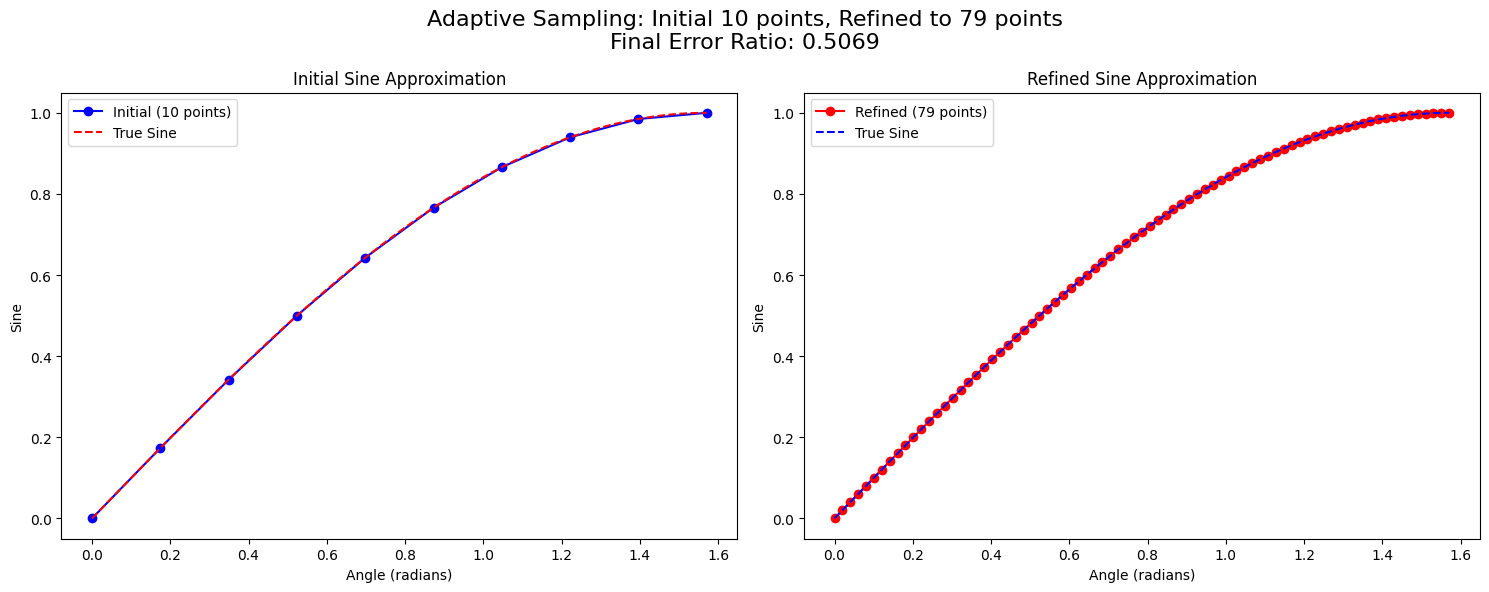

In [47]:
# Main execution
initial_angles, initial_sine, final_angles, final_sine, second_deriv, final_num_points, error_ratio = adaptive_point_sampling()
refined_angles, refined_sine = refine_sample_points(final_angles, final_sine, second_deriv)

# Create lookup tables
initial_table = create_table(initial_angles, initial_sine)
refined_table = create_table(refined_angles, refined_sine)

# Output results
print("Initial Lookup Table (10 points):")
print(initial_table)
print("\nRefined Lookup Table:")
print(refined_table)
print(f"\nInitial number of points: 10")
print(f"Final number of points after adaptive sampling: {final_num_points}")
print(f"Number of points after refinement: {len(refined_angles)}")
print(f"Final Error Ratio: {error_ratio:.4f}")

# Visualize results
plot_results(initial_angles, initial_sine, refined_angles, refined_sine, error_ratio)